In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

AttributeError: type object 'h5py.h5.H5PYConfig' has no attribute '__reduce_cython__'

In [2]:
mnist=tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
from keras.utils.np_utils import to_categorical
y_train_ohe=to_categorical(y_train)
y_test_ohe=to_categorical(y_test)

In [5]:
x_train=tf.keras.utils.normalize(x_train,axis=1)
x_test=tf.keras.utils.normalize(x_test,axis=1)

In [15]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=128,activation='relu'))
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

In [16]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [35]:
model.fit(x_train, y_train_ohe,validation_data=(x_test,y_test_ohe),epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0531 - accuracy: 0.9830 - val_loss: 0.0963 - val_accuracy: 0.9701
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0420 - accuracy: 0.9863 - val_loss: 0.0907 - val_accuracy: 0.9733
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0315 - accuracy: 0.9896 - val_loss: 0.0952 - val_accuracy: 0.9731
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0266 - accuracy: 0.9911 - val_loss: 0.0995 - val_accuracy: 0.9717
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0220 - accuracy: 0.9925 - val_loss: 0.0964 - val_accuracy: 0.9754
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0184 - accuracy: 0.9936 - val_loss: 0.0995 - val_accuracy: 0.9759
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0140 - accuracy: 0.9952 - val_loss: 0.1033 - val_accuracy:

Predicted digit is:2


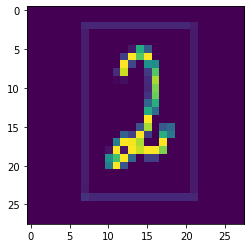

Predicted digit is:7


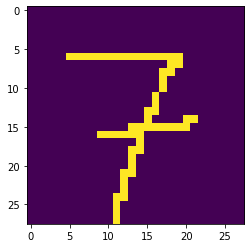

Predicted digit is:5


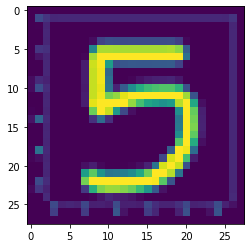

Predicted digit is:8


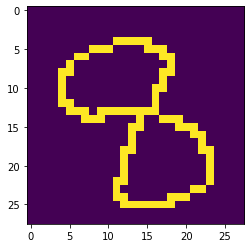

In [34]:
for img in range(1,5):
    image=cv.imread(f'{img}.png')[:,:,0]
    image=np.invert(np.array([image]))
    prediction=model.predict(image)
    print(f'Predicted digit is:{np.argmax(prediction)}')
    plt.imshow(image[0])
    plt.show()